In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [146]:
df=pd.read_csv('../data-wrangling/suicide_unemployment_depresion.csv', index_col=0)
df

,year,country,sex,suicides_no,population,HDIforyear,gdp_for_year($),gdp_per_capita($),unemployment,depression_rate,suicides_per_100K
0,1985,Antigua and Barbuda,female,0,32292,NaN,240923926,3850,NaN,NaN,0.000000
1,1985,Antigua and Barbuda,male,0,30282,NaN,240923926,3850,NaN,NaN,0.000000
2,1985,Argentina,female,538,13690900,0.694,88416668900,3264,NaN,NaN,3.929617
3,1985,Argentina,male,1450,13399900,0.694,88416668900,3264,NaN,NaN,10.820976
4,1985,Australia,female,425,7313800,NaN,180190994861,12374,8.7628,NaN,5.810933
...,...,...,...,...,...,...,...,...,...,...,...
4637,2016,Romania,male,1643,8054969,NaN,187805922349,10020,6.5875,1.984293,20.397347
4638,2016,Sweden,female,348,4084416,NaN,514459972806,55594,6.5859,5.842276,8.520190
4639,2016,Sweden,male,782,4041436,NaN,514459972806,55594,7.3573,3.147301,19.349558
4640,2016,Thailand,female,842,27496685,NaN,411755164833,6713,0.7143,3.560438,3.062187


In [147]:
df['year']=pd.to_datetime(df['year'], format='%Y')

In [148]:
df['country'].unique()

array(['Antigua and Barbuda', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Bahrain', 'Barbados', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Dominica', 'Ecuador',
       'France', 'Greece', 'Grenada', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Kuwait', 'Luxembourg', 'Malta',
       'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Panama',
       'Paraguay', 'Portugal', 'Puerto Rico', 'Republic of Korea',
       'Saint Vincent and Grenadines', 'Seychelles', 'Singapore', 'Spain',
       'Sri Lanka', 'Suriname', 'Thailand', 'Trinidad and Tobago',
       'United Kingdom', 'United States', 'Uruguay', 'Belize',
       'Guatemala', 'Norway', 'Saint Lucia', 'Albania', 'Finland',
       'Sweden', 'Turkmenistan', 'Ukraine', 'Guyana', 'Romania',
       'Russian Federation', 'Armenia', 'Azerbaijan', 'Belarus',
       'Czech Republic', 'El Salvador', 'Georgia', 'Germany',
       'Kazakhstan', 'Kyrgyzstan', 'Poland',

In [149]:
###Model per country

In [150]:
# A function to select and loc the data from a country.

def data_country(country):
    i=df.loc[df['country']==country]
    return i

In [206]:
#data_country('Germany').groupby('year').agg({'depression_rate':divide()})
def ratio_FM(country):
    
    #table for female
    f=data_country(country).loc[data_country(country)['sex']=='female']
    #table for male
    m=data_country(country).loc[data_country(country)['sex']=='male']
    #join them
    i=pd.merge(f, m,  how='left', left_on=['country','year'], 
                          right_on = ['country','year'])
    
    #create the ratios
    i['ratio_suicide']=abs(i['suicides_per_100K_y']/i['suicides_per_100K_x'])
    i['ratio_depression']=abs(i['depression_rate_y']/i['depression_rate_x'])
    i['ratio_unemployment']=i['unemployment_y']-i['unemployment_x']
    
    return i[['year','country','gdp_for_year($)_y','HDIforyear_y','suicides_per_100K_y','suicides_per_100K_x','gdp_per_capita($)_y','ratio_suicide','ratio_depression','unemployment_y','unemployment_x']].copy()

    

In [207]:
ratio_FM('Germany')

,year,country,gdp_for_year($)_y,HDIforyear_y,suicides_per_100K_y,suicides_per_100K_x,gdp_per_capita($)_y,ratio_suicide,ratio_depression,unemployment_y,unemployment_x
0,1990-01-01,Germany,1764967948917,0.801,26.472377,11.272625,23546,2.348377,0.572171,4.0393,6.1190
1,1991-01-01,Germany,1861873895109,NaN,26.560966,11.123658,24662,2.387791,0.572850,4.4244,6.5251
2,1992-01-01,Germany,2123130870382,NaN,25.362999,10.497541,27888,2.416090,0.574403,4.9109,8.2263
3,1993-01-01,Germany,2068555542411,NaN,24.096710,9.416838,26937,2.558896,0.576056,6.4606,9.3198
4,1994-01-01,Germany,2205966011812,NaN,24.417641,9.021331,28588,2.706656,0.578413,7.5441,10.3158
5,1995-01-01,Germany,2591620035485,0.830,24.513622,9.181619,33420,2.669858,0.580111,7.0530,9.6285
6,1996-01-01,Germany,2503665193657,NaN,23.072978,8.730561,32147,2.642783,0.584366,8.2420,9.5933
7,1997-01-01,Germany,2218689375141,NaN,23.284130,8.526154,28420,2.730906,0.591194,9.3083,10.5914
8,1998-01-01,Germany,2243225519618,NaN,22.605315,7.661240,28733,2.950608,0.598970,9.2892,10.4390
9,1999-01-01,Germany,2199957383337,NaN,21.256227,7.672099,28154,2.770588,0.604913,8.5594,9.2353


In [208]:
def plot_ratios(country):

    fig, ax1 = plt.subplots(figsize=(20,10))
    
    fig.subplots_adjust(right=0.8)

    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    
    ax3.spines["right"].set_position(("axes", 1.1))
    
    df=ratio_FM(country)
    
    ax1.plot(df['year'], df['ratio_suicide'], 'r-',label="ratio_suicide",linewidth=4)

    #(% of the labor force)    
    ax2.plot(df['year'], df['ratio_depression'], color='grey', label="ratio_depression",linewidth=2,linestyle='-') 
    
    ax3.plot(df['year'], df['unemployment_x'],color='magenta',label="unemployment_women",linestyle='--')
    ax3.plot(df['year'], df['unemployment_y'],color='deepskyblue',label="unemployment_men",linestyle='--')
    
    ax1.set_xlabel("Year")
    ax1.set_ylabel("ratio_suicide")
    ax2.set_ylabel("ratio_depression")
    ax3.set_ylabel("ratio_unemployment")
    
    ax1.yaxis.label.set_color('red')
    ax2.yaxis.label.set_color('grey')
    ax3.yaxis.label.set_color('m')

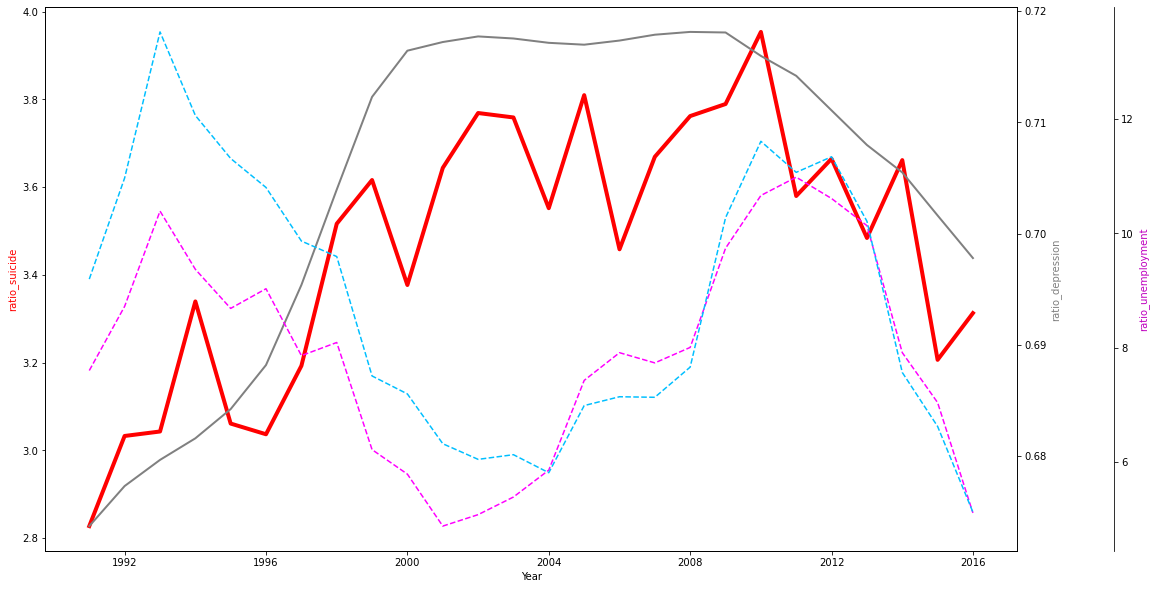

In [223]:
plot_ratios('Hungary')

In [210]:
#building the model and see the coeficients



def model_country(country):
    df=ratio_FM(country)
    df = sm.add_constant(df)
    y = df['ratio_suicide']
    X = df[[ 'const','unemployment_x','unemployment_y', 'ratio_depression','gdp_per_capita($)_y']]
    lin_reg = sm.OLS(y, X).fit()
    return lin_reg.summary()

In [211]:
model_country('Germany')

C:\Users\johnz\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in reduce
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ratio_suicide   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     49.85
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           2.00e-10
Time:                        12:30:37   Log-Likelihood:                 32.477
No. Observations:                  26   AIC:                            -54.95
Df Residuals:                      21   BIC:                            -48.66
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.0478      1.470     -3.433      0.002      -8.106      -1.990
unemployment_x          0.0048      0.022      0.223      0.826      -0.040       0.050
unemployment_y          0.0119      0.022      0.535      0.598      -0.034       0.058
ratio_depression       11.9856      2.445      4.903      0.000       6.902      17.069
gdp_per_capita($)_y  1.968e-05   2.71e-06      7.262      0.000     1.4e-05    2.53e-05
==============================================================================
Omnibus:                        0.667   Durbin-Watson:                   2.468
Prob(Omnibus):                  0.716   Jarque-Bera (JB):                0.701
Skew:                           0.162   Prob(JB):                        0.704
Kurtosis:                       2.263   Cond. No.                     6.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [212]:
### per year

In [213]:
def data_year(year):
    i=df.loc[df['year']==pd.to_datetime(year, format='%Y')]
    return i

In [214]:
data_year('2010')

,year,country,sex,suicides_no,population,HDIforyear,gdp_for_year($),gdp_per_capita($),unemployment,depression_rate,suicides_per_100K
3660,2010-01-01,Albania,female,35,1371628,0.722,11926953259,4359,15.843800,2.739038,2.551712
3661,2010-01-01,Albania,male,61,1364397,0.722,11926953259,4359,12.732000,1.646725,4.470839
3662,2010-01-01,Argentina,female,566,19269234,0.811,423627422092,11273,9.168900,4.534164,2.937325
3663,2010-01-01,Argentina,male,2377,18309220,0.811,423627422092,11273,6.647400,2.689928,12.982530
3664,2010-01-01,Armenia,female,19,1437243,0.721,9260284938,3460,21.233601,3.115304,1.321975
...,...,...,...,...,...,...,...,...,...,...,...
3831,2010-01-01,United States,male,30275,141810594,0.909,14964372000000,51989,10.521100,3.498460,21.348899
3832,2010-01-01,Uruguay,female,126,1626515,0.780,40284481652,12882,9.395800,4.312488,7.746624
3833,2010-01-01,Uruguay,male,421,1500791,0.780,40284481652,12882,5.271100,2.656078,28.051874
3834,2010-01-01,Uzbekistan,female,453,12940656,0.655,39332770929,1533,6.300000,3.330128,3.500595


In [217]:
def plot_gdp_suicide(year):
    fig, ax = plt.subplots(figsize=(15,10))

    ax = sns.scatterplot(x=data_year(year)['HDIforyear'],
                         y=data_year(year)['suicides_per_100K'],
                         hue=data_year(year)['sex'], data=data_year(year), style='sex')
    
    fig, ax2 = plt.subplots(figsize=(15,10)) 
    
    ax2 = sns.scatterplot(x=data_year(year)['gdp_for_year($)'],
                         y=data_year(year)['suicides_per_100K'],
                         hue=data_year(year)['sex'], data=data_year(year), style='sex')
    plt.xscale('log')

    
    ax.set_xlabel("HDIforyear")
    ax.set_ylabel("suicides_per_100Ks")

    
    

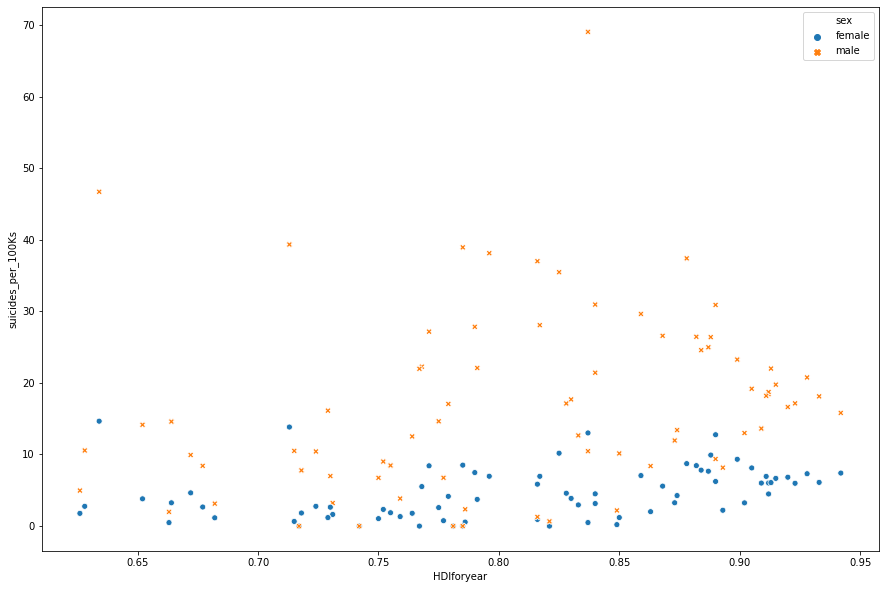

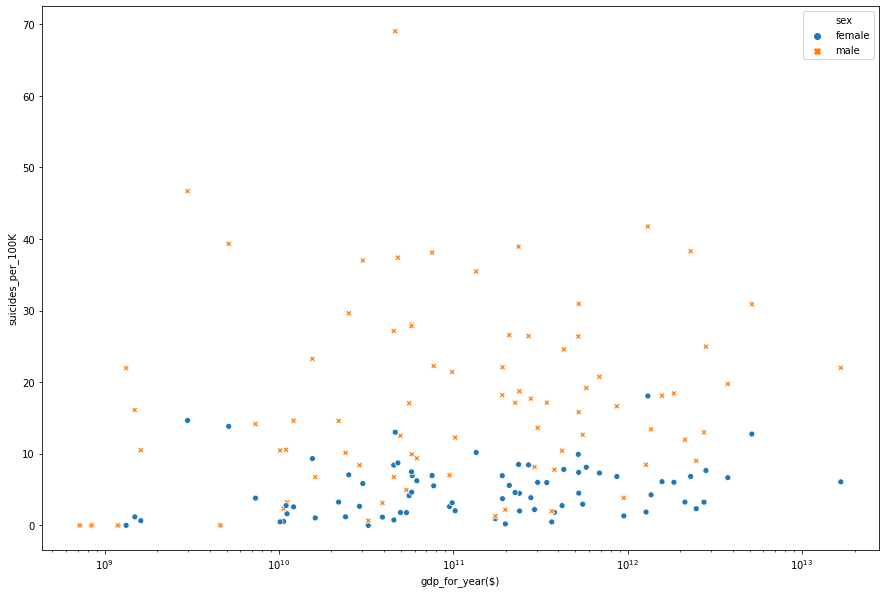

In [222]:
plot_gdp_suicide('2013')

In [172]:

def year_country_gdp(year):
    
    #table for female
    f=data_year(year).loc[data_year(year)['sex']=='female']
    #table for male
    m=data_year(year).loc[data_year(year)['sex']=='male']
    #join them
    i=pd.merge(f, m,  how='left', left_on=['country','year'], 
                          right_on = ['country','year'])
    
    #create the ratios
    i['suicide ratio']=abs(i['suicides_per_100K_y']-i['suicides_per_100K_x'])
    i['ratio_depression']=abs(i['depression_rate_y']-i['depression_rate_x'])
    i['ratio_unemployment']=i['unemployment_y']-i['unemployment_x']
    
    return i#[['year','country','HDIforyear_y','gdp_per_capita($)_y','ratio_suicide','ratio_depression','unemployment_y','unemployment_x']].copy()
    

In [132]:
year_country_gdp('2010')

,year,country,sex_x,suicides_no_x,population_x,HDIforyear_x,gdp_for_year($)_x,gdp_per_capita($)_x,unemployment_x,depression_rate_x,...,population_y,HDIforyear_y,gdp_for_year($)_y,gdp_per_capita($)_y,unemployment_y,depression_rate_y,suicides_per_100K_y,suicide ratio,ratio_depression,ratio_unemployment
0,2010-01-01,Albania,female,35,1371628,0.722,11926953259,4359,15.843800,2.739038,...,1364397,0.722,11926953259,4359,12.7320,1.646725,4.470839,1.919127,1.092313,-3.111799
1,2010-01-01,Argentina,female,566,19269234,0.811,423627422092,11273,9.168900,4.534164,...,18309220,0.811,423627422092,11273,6.6474,2.689928,12.982530,10.045205,1.844236,-2.521500
2,2010-01-01,Armenia,female,19,1437243,0.721,9260284938,3460,21.233601,3.115304,...,1238982,0.721,9260284938,3460,17.0432,2.209543,4.358417,3.036441,0.905761,-4.190401
3,2010-01-01,Aruba,female,1,49943,NaN,2467703911,25974,10.430000,NaN,...,45063,NaN,2467703911,25974,10.7700,NaN,13.314693,11.312410,NaN,0.340000
4,2010-01-01,Australia,female,553,10491256,0.927,1144260547873,54887,5.375500,5.875990,...,10356291,0.927,1144260547873,54887,5.0746,3.755685,18.027690,12.756633,2.120304,-0.300900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2010-01-01,United Arab Emirates,female,22,1898035,0.828,289787338325,36964,NaN,3.577526,...,5941701,0.828,289787338325,36964,NaN,2.628982,1.497888,0.338794,0.948545,NaN
84,2010-01-01,United Kingdom,female,963,29737559,0.906,2441173394730,41798,6.875000,4.914907,...,28665970,0.906,2441173394730,41798,8.5704,3.294678,11.250273,8.011944,1.620229,1.695400
85,2010-01-01,United States,female,8087,146028555,0.909,14964372000000,51989,8.621300,5.976154,...,141810594,0.909,14964372000000,51989,10.5211,3.498460,21.348899,15.810941,2.477694,1.899800
86,2010-01-01,Uruguay,female,126,1626515,0.780,40284481652,12882,9.395800,4.312488,...,1500791,0.780,40284481652,12882,5.2711,2.656078,28.051874,20.305250,1.656410,-4.124700
